In [1]:
import yfinance as yf

# Download historical data for a stock
data = yf.download('AAPL', start='2022-01-01', end='2023-01-01')
print(data.head())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.724579   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.443542   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.723572   
2022-01-06  172.699997  175.300003  171.639999  172.000000  169.840240   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.008118   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


In [7]:
import ta

# Calculate Simple Moving Average (SMA)
data['SMA_50'] = ta.trend.sma_indicator(data['Close'], window=50)

# Calculate Relative Strength Index (RSI)
data['RSI'] = ta.momentum.rsi(data['Close'], window=14)

# Calculate Moving Average Convergence Divergence (MACD)
data['MACD'] = ta.trend.macd(data['Close'])


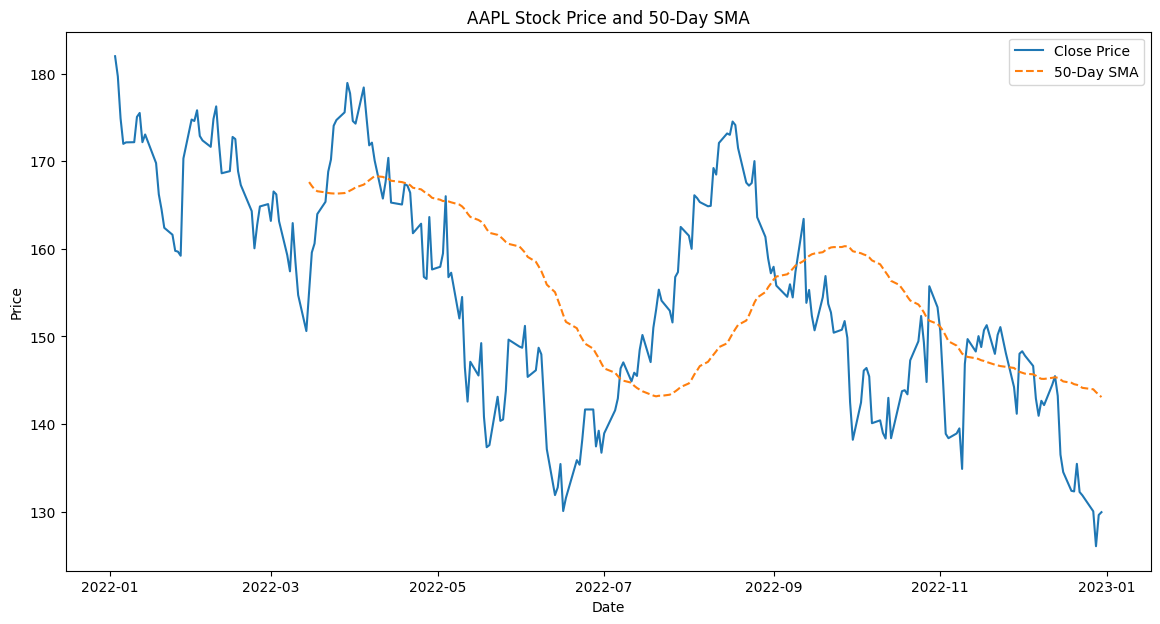

In [8]:
import matplotlib.pyplot as plt

# Plot the closing price and SMA
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_50'], label='50-Day SMA', linestyle='--')
plt.title('AAPL Stock Price and 50-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


    currentValue                             name
0       77478.93                       BSE SENSEX
1       24784.63                    BSE SENSEX 50
2       82021.51               BSE SENSEX Next 50
3       25021.26                          BSE 100
4        8874.75              BSE Bharat 22 Index
5       46086.53                       BSE MidCap
6       51906.49                     BSE SmallCap
7       10968.37                          BSE 200
8       15696.91             BSE 150 MidCap Index
9        6889.85           BSE 250 SmallCap Index
10      10432.62        BSE 250 LargeMidCap Index
11      11920.16        BSE 400 MidSmallCap Index
12      35240.94                          BSE 500
13      10290.14                       BSE AllCap
14       9280.77                     BSE LargeCap
15       7746.99        BSE SmallCap Select Index
16      16470.41          BSE MidCap Select Index
17       8918.51       BSE 100 LargeCap TMC Index
18      13875.40           BSE SENSEX Next 50 TMC


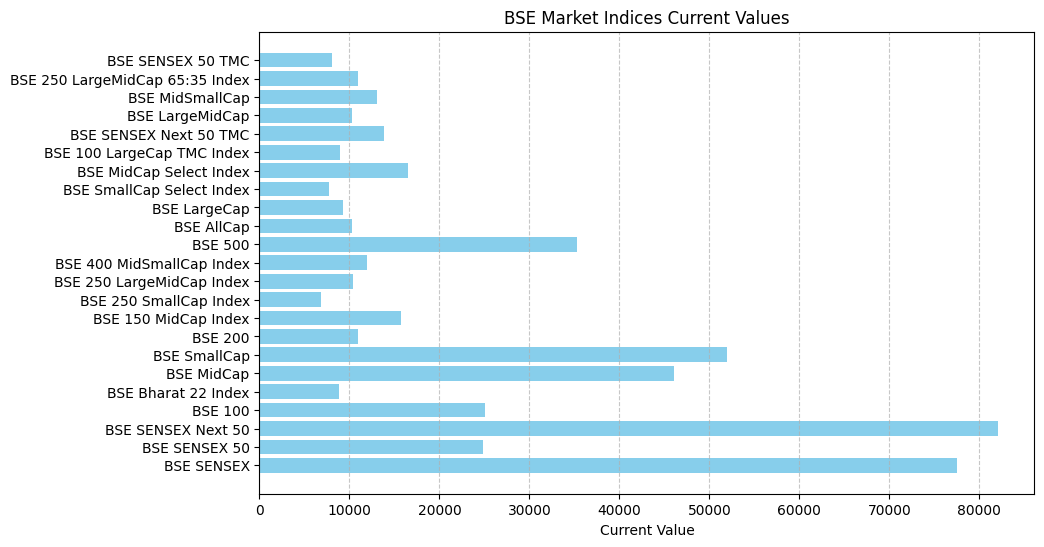

[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_548/2997971815.py:49: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][50:] = np.where(data['SMA_50'][50:] > data['Close'][50:], 1, 0)
/tmp/ipyke

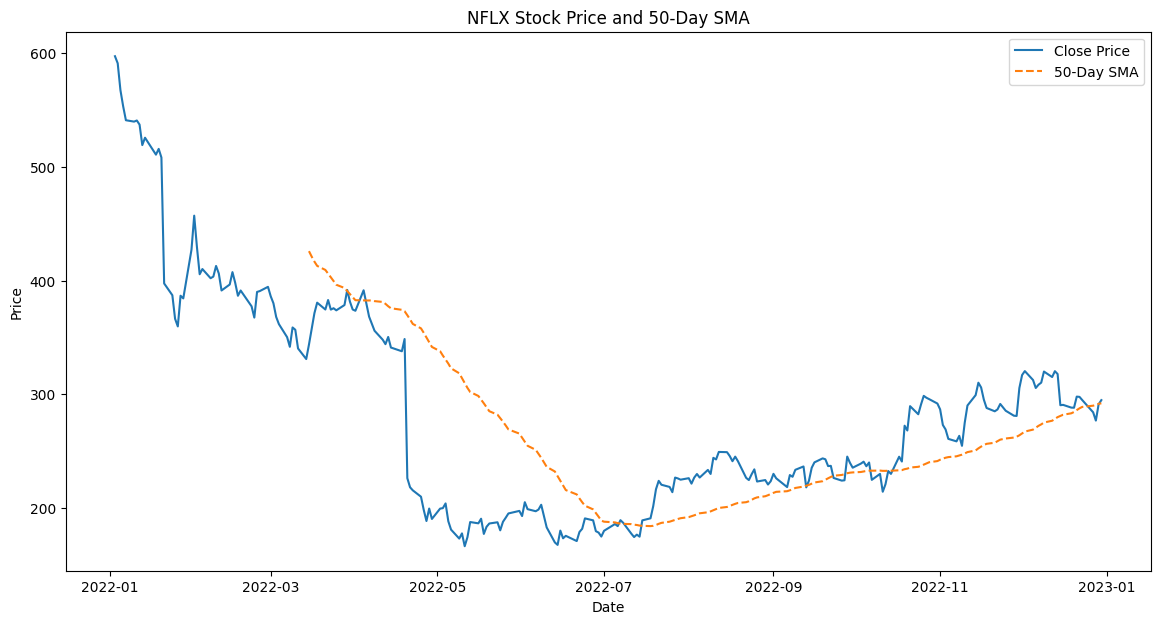

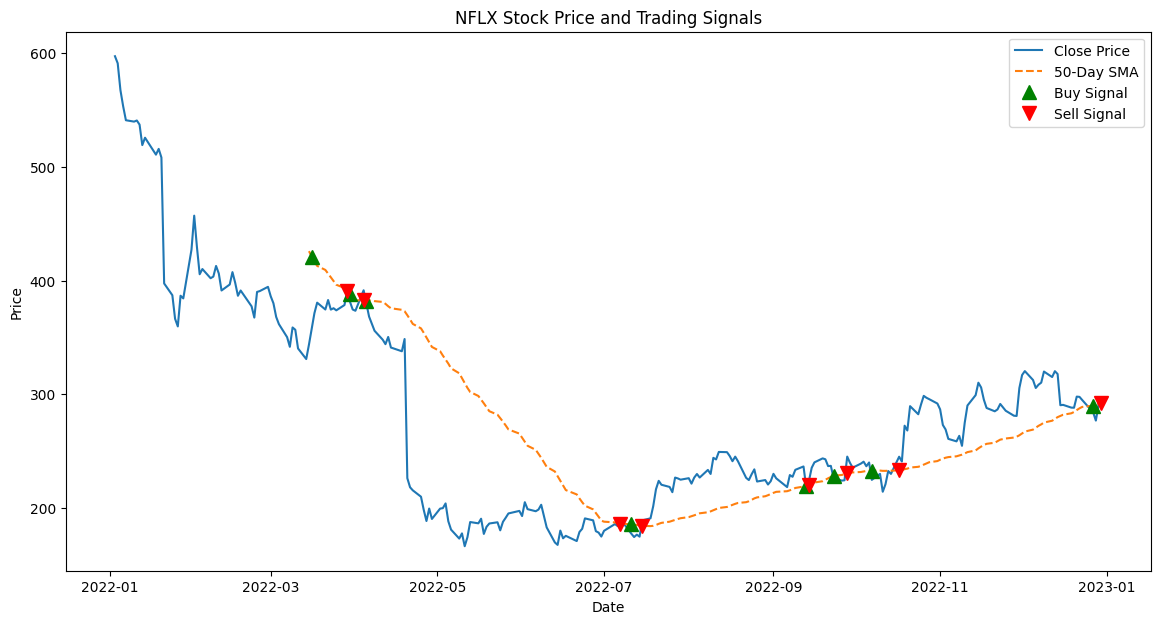

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import numpy as np
import ta

# Initialize BSE object and update codes
from bsedata.bse import BSE
b = BSE(update_codes=True)

# Get market indices data
q = b.getIndices('market_cap/broad')['indices']

# Convert to DataFrame
df = pd.DataFrame(q)

# Replace commas in 'currentValue' and convert to float
df['currentValue'] = df['currentValue'].str.replace(',', '').astype(float)

# Select relevant columns
df_selected = df[['currentValue', 'name']]

# Print the DataFrame
print(df_selected)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(df_selected['name'], df_selected['currentValue'], color='skyblue')
plt.xlabel('Current Value')
plt.title('BSE Market Indices Current Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Example: Fetch historical data for an individual stock
symbol = 'NFLX'
data = yf.download(symbol, start='2022-01-01', end='2023-01-01')

# Calculate Simple Moving Average (SMA)
data['SMA_50'] = ta.trend.sma_indicator(data['Close'], window=50)

# Calculate Relative Strength Index (RSI)
data['RSI'] = ta.momentum.rsi(data['Close'], window=14)

# Calculate Moving Average Convergence Divergence (MACD)
data['MACD'] = ta.trend.macd(data['Close'])

# Implement a simple trading strategy (e.g., moving average crossover)
data['Signal'] = 0
data['Signal'][50:] = np.where(data['SMA_50'][50:] > data['Close'][50:], 1, 0)
data['Position'] = data['Signal'].diff()

# Plot closing price and SMA
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_50'], label='50-Day SMA', linestyle='--')
plt.title(f'{symbol} Stock Price and 50-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot buy and sell signals
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_50'], label='50-Day SMA', linestyle='--')
plt.plot(data[data['Position'] == 1].index, data['SMA_50'][data['Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data[data['Position'] == -1].index, data['SMA_50'][data['Position'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
plt.title(f'{symbol} Stock Price and Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

